# Algorithme de regularisation TV

In [1]:
# General import
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.myfunc import nablah
from Codes.myfunc import convolve
from Codes.simplex import Simplex
# iteration FBstep
from Codes.fbstep import FBS_im
from Codes.fbstep import FBS_dual
from Codes.fbstep import Energy

In [2]:
# Data

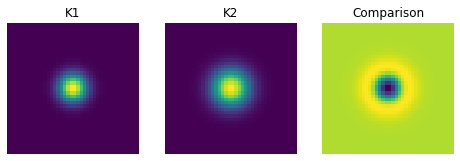

Erreur |K1 - K2|/ |K2| : 0.3500 


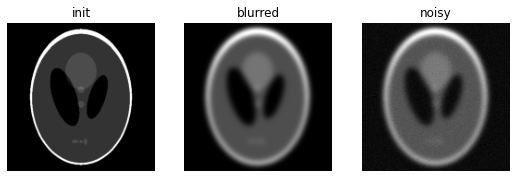

Erreur blurred |x_blurr- x_true|_2 :0.5093
Erreur |x_noisy - x_true|_2 :0.5108


In [3]:
K, _, x_im, x_b, x_o1 = DataGen()

In [34]:
# Algo
#
niter_TV = 2000
Etot     = np.zeros(2*niter_TV)
Ed       = np.zeros(2*niter_TV)
x_in     = x_o1.copy()
mu       = 0.002
# Matrix sizes
Nx, Ny   = x_in.shape # image size
# initialisation
xi       = x_in.copy()
xi       = x_in.copy() # image
xbar     = x_in.copy() # image
xold     = x_in.copy() # image saved for relaxation
px       = np.zeros((Nx,Ny)) 
py       = np.zeros((Nx,Ny))

In [35]:
count = 0
for n in range(niter_TV):
    # one FBS for image
    xi            = FBS_im(xi,K,px,py,x_in,mu)
    # energy
    Etot[count],Ed[count] = Energy(xi,K,px,py,x_in,np.zeros((Nx,Ny)),0,mu)
    count        +=1
    # one FBS for dual variable
    px,py = FBS_dual(xbar,K,px,py,mu)
    # energy
    Etot[count],Ed[count]  = Energy(xi,K,px,py,x_in,np.zeros((Nx,Ny)),0,mu)
    count        +=1
    # relaxation
    xbar          = 2*xi-xold
    xold          = xi.copy()

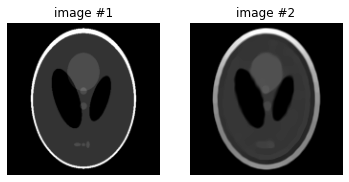

Erreur |im1 - im2|/|im2| :0.3896


In [36]:
Display_im(x_im,xi)

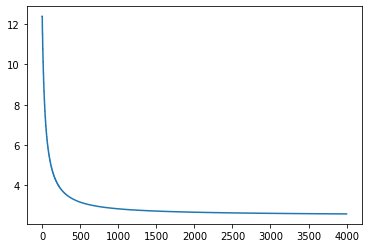

In [37]:
plt.plot(Etot)

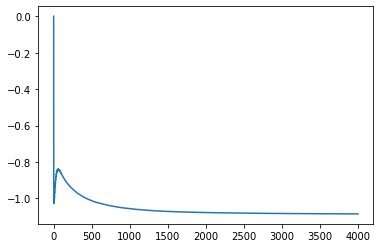

In [38]:
plt.plot(Ed)